__The Olivetti Faces Dataset__

In [1]:
# Importing libraries

from sklearn import datasets
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

In [2]:
# Importing the data set

faces = datasets.fetch_olivetti_faces()
df = pd.DataFrame(data=faces.data,index=range(400))

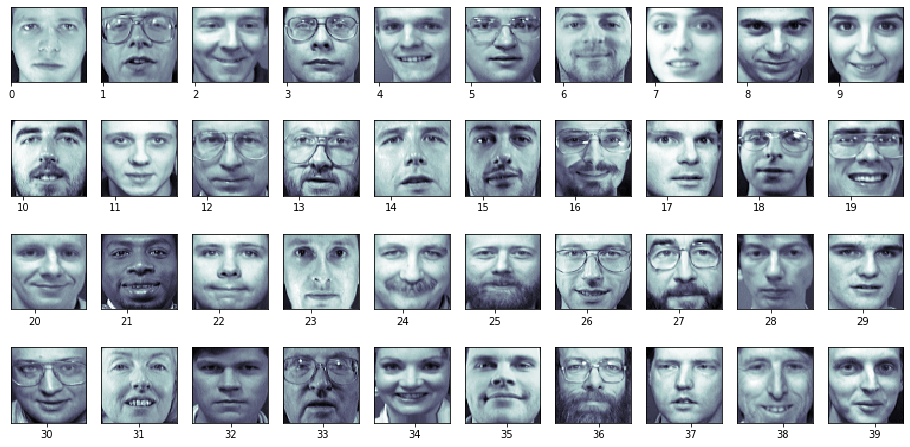

In [99]:
# Showing the 40 distinct people

fig=plt.figure(figsize=(16,8))
for i in range(40):
    ax=fig.add_subplot(4,10,i+1,xticks=[i], yticks=[])
    ax.imshow(faces.images[i*10], cmap=plt.cm.bone)

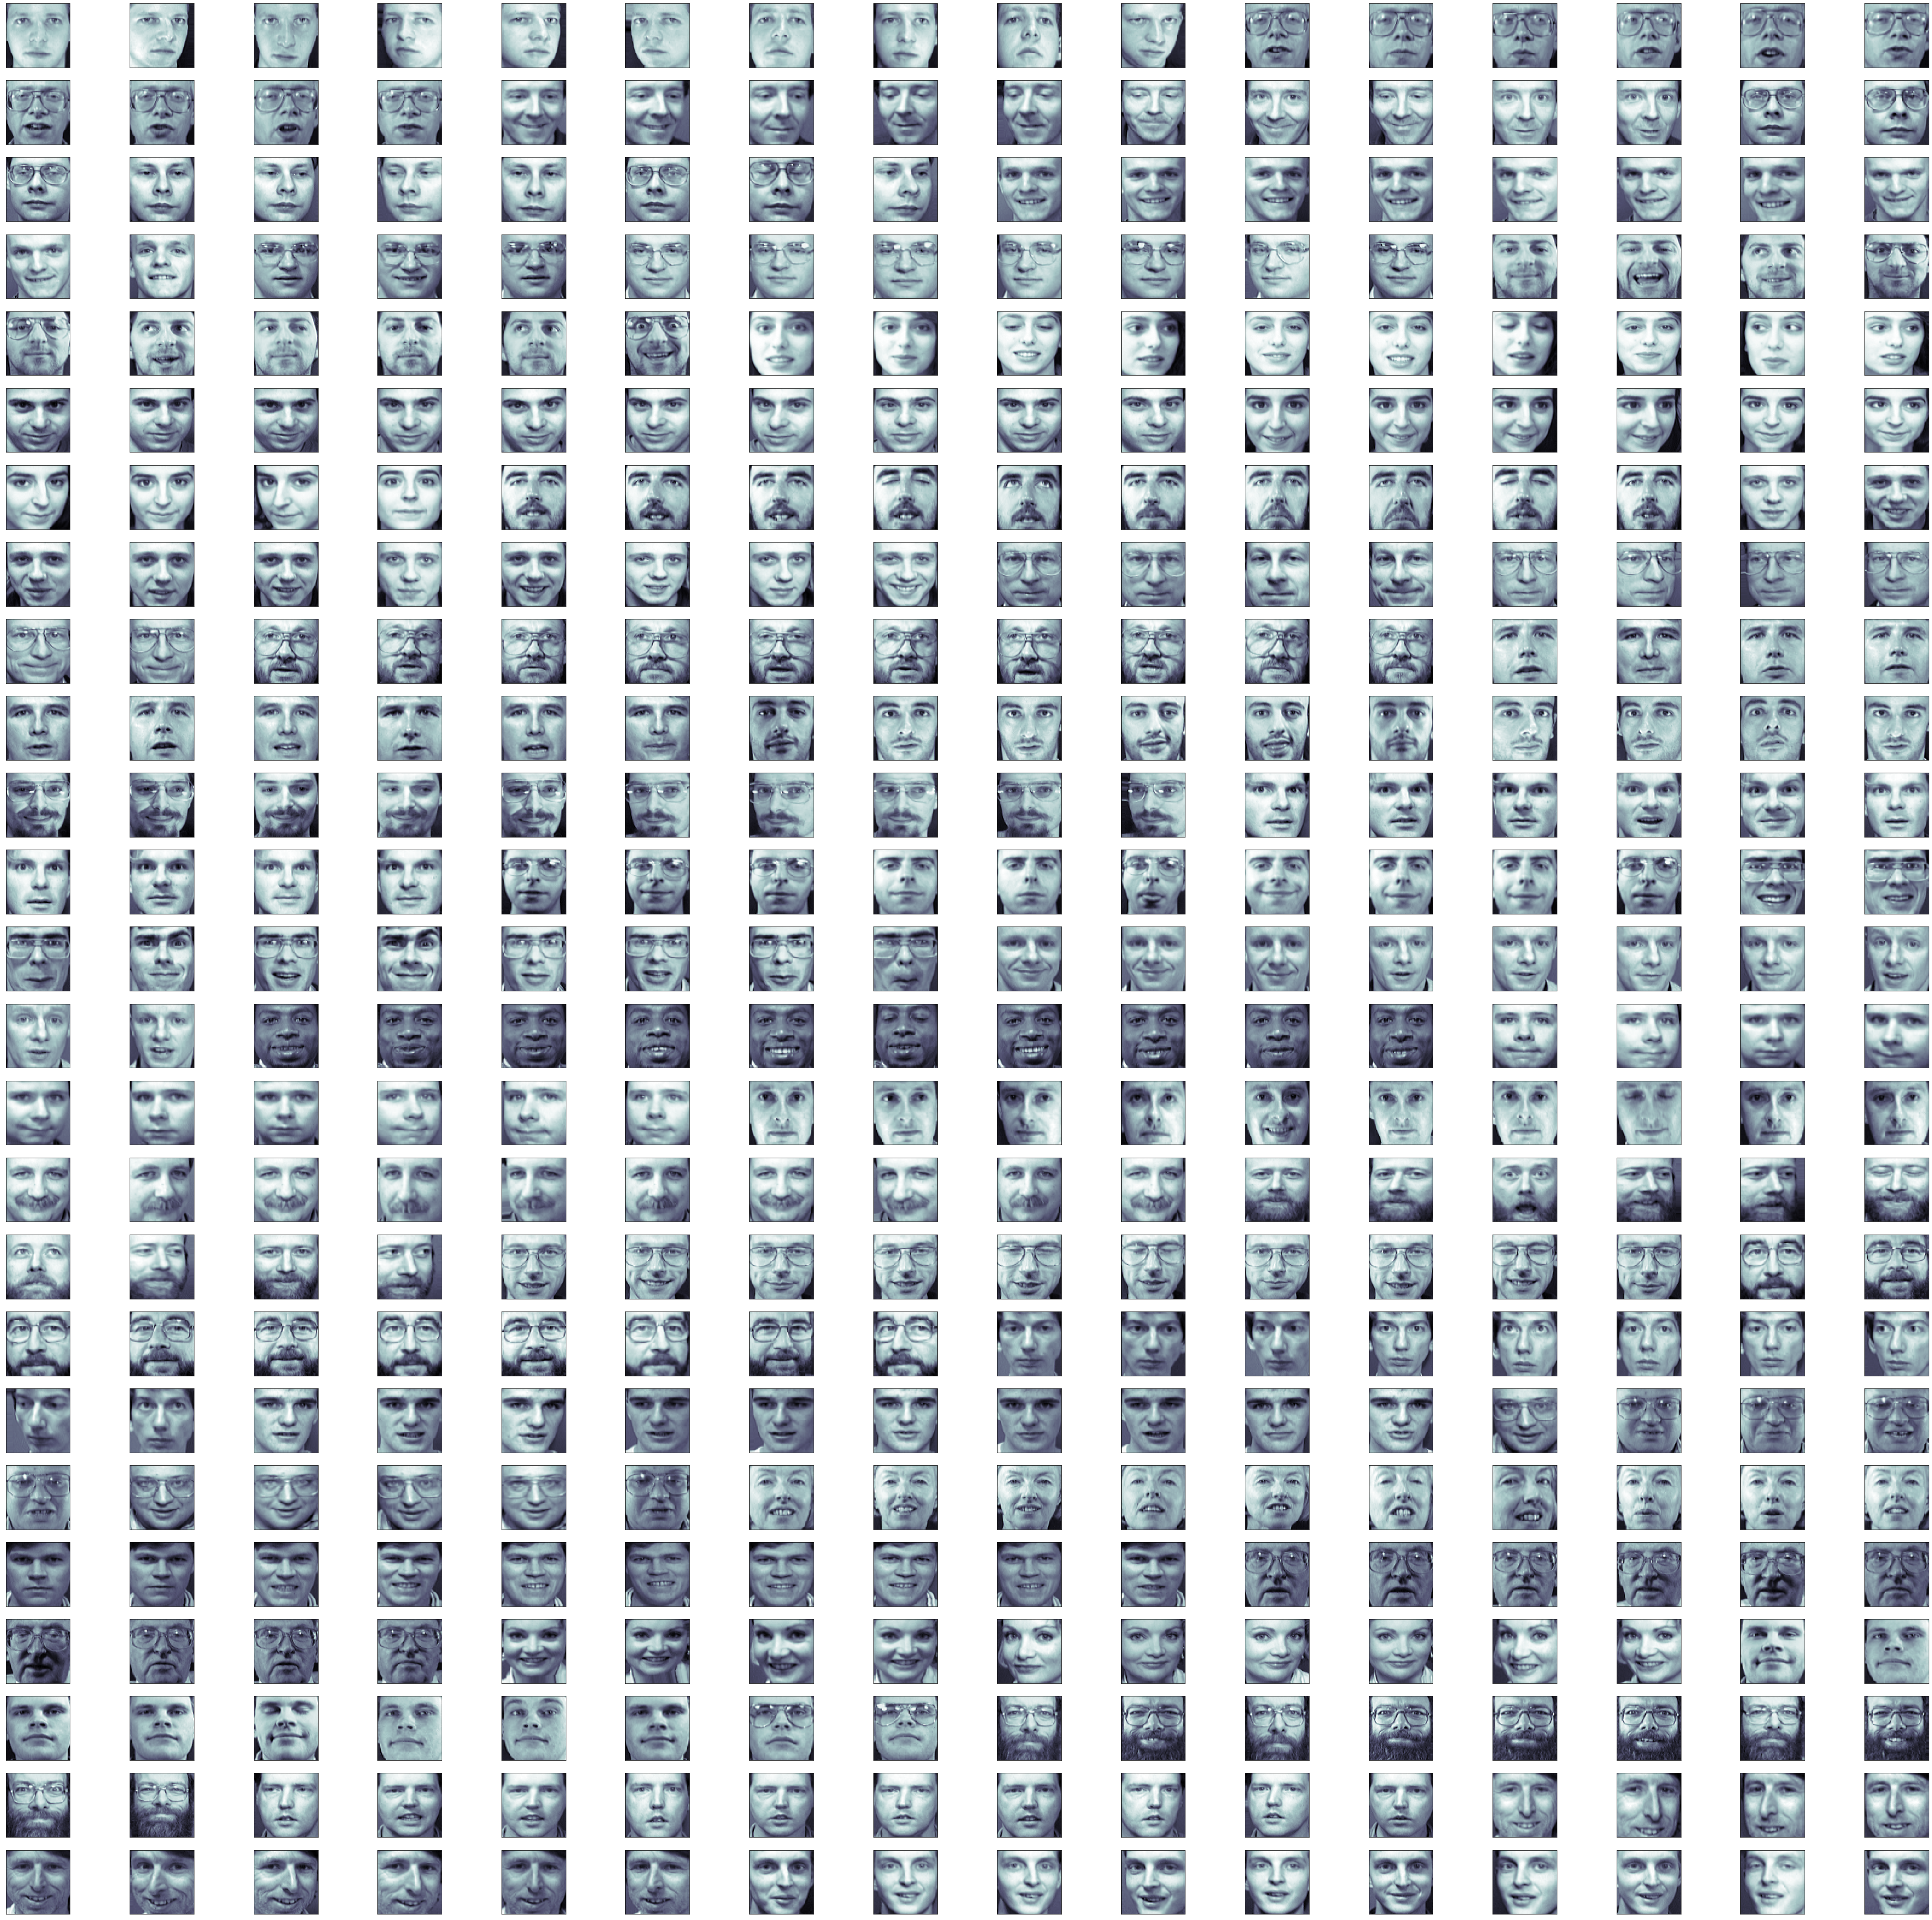

In [100]:
# Showing the all images

fig=plt.figure(figsize=(64,64))
for i in range(400):
    ax=fig.add_subplot(25,16,i+1,xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
# Feature Scaling

scl = StandardScaler()
faces_data = scl.fit_transform(faces.data)


In [4]:
faces_data.shape

(400, 4096)

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0, 0.5, 'LDA2')

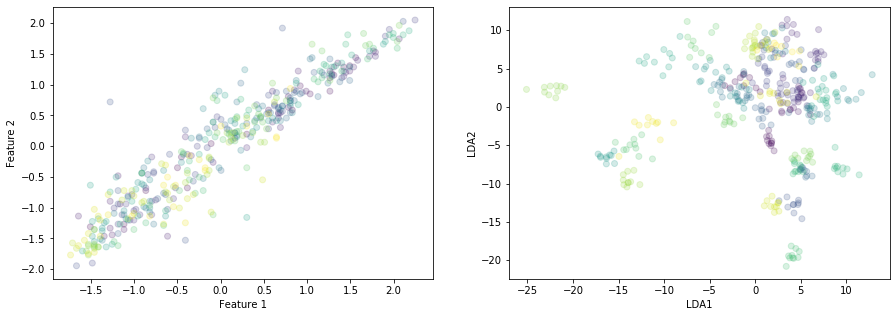

In [51]:
# Transformed data by LDA

lda=LinearDiscriminantAnalysis(n_components=2)
X_train_lda=lda.fit(faces_data, faces.target)
X_train=lda.transform(faces_data)

fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(faces_data[:,0], faces_data[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#fig.add_subplot(1,3,2)
#plt.scatter(faces_data[:,0], faces_data[:,2], alpha=0.2, c=faces.target, cmap='viridis')
fig.add_subplot(1,2,2)
plt.scatter(X_train[:,0], X_train[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('LDA1')
plt.ylabel('LDA2')

In [96]:
# Performing LDA

dimension=[2,5,15]
for i in dimension:
    lda = LinearDiscriminantAnalysis(n_components = i)
    scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']
    scores = cross_validate(lda, faces_data, faces.target, scoring = scoring, cv = 3)
    print('{}D-LDA'.format(i))
    print('Fit Time', scores['fit_time'].mean().round(3))
    print('Score Time', scores['score_time'].mean().round(3))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print('---')
    print(scores)
    '''df_dict = {}
    #for name in dimension:
       # df_dict[name]=pd.DataFrame(scores)
    df=['2DLDA','5DLDA']   
    for name in df:
        exec('{} = pd.DataFrame(scores)'.format(name))
    #variable[j]=pd.DataFrame(scores)'''
    '''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
    axes.set_title('Histogram of Scores Performed by the 2D LDA')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    sns.distplot(scores_2DLDA['test_accuracy'])'''
       

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


2D-LDA
Fit Time 0.324
Score Time 0.023
Accuracy: 0.97 (+/- 0.01)
Precision: 0.98 (+/- 0.01)
Recall: 0.97 (+/- 0.01)
f1-score: 0.97 (+/- 0.01)
---
{'fit_time': array([0.35106087, 0.22938871, 0.3929503 ]), 'score_time': array([0.02293825, 0.02393579, 0.02293539]), 'test_accuracy': array([0.975     , 0.96666667, 0.975     ]), 'test_precision_macro': array([0.98166667, 0.975     , 0.98125   ]), 'test_recall_macro': array([0.975     , 0.96666667, 0.975     ]), 'test_f1_macro': array([0.97396825, 0.96571429, 0.97428571])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


5D-LDA
Fit Time 0.424
Score Time 0.026
Accuracy: 0.97 (+/- 0.01)
Precision: 0.98 (+/- 0.01)
Recall: 0.97 (+/- 0.01)
f1-score: 0.97 (+/- 0.01)
---
{'fit_time': array([0.46575236, 0.35006285, 0.45478344]), 'score_time': array([0.02792573, 0.02593374, 0.02493382]), 'test_accuracy': array([0.975     , 0.96666667, 0.975     ]), 'test_precision_macro': array([0.98166667, 0.975     , 0.98125   ]), 'test_recall_macro': array([0.975     , 0.96666667, 0.975     ]), 'test_f1_macro': array([0.97396825, 0.96571429, 0.97428571])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


15D-LDA
Fit Time 0.378
Score Time 0.026
Accuracy: 0.97 (+/- 0.01)
Precision: 0.98 (+/- 0.01)
Recall: 0.97 (+/- 0.01)
f1-score: 0.97 (+/- 0.01)
---
{'fit_time': array([0.44082046, 0.45378566, 0.2403574 ]), 'score_time': array([0.02892423, 0.02393532, 0.02393579]), 'test_accuracy': array([0.975     , 0.96666667, 0.975     ]), 'test_precision_macro': array([0.98166667, 0.975     , 0.98125   ]), 'test_recall_macro': array([0.975     , 0.96666667, 0.975     ]), 'test_f1_macro': array([0.97396825, 0.96571429, 0.97428571])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [8]:
# Performing SVM with different kernels

models=[]
models.append(("Linear-SVM",SVC(kernel = 'linear')))
models.append(("RBF-SVM",SVC(kernel = 'rbf')))
models.append(("Polynomial-SVM",SVC(kernel = 'poly')))
models.append(("Sigmoid-SVM",SVC(kernel = 'sigmoid')))

for name, model in models:
    
    scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']        
    scores = cross_validate(model, faces_data, faces.target, scoring = scoring, cv = 3)
    print(name)
    print('Fit Time', scores['fit_time'].mean().round(3))
    print('Score Time', scores['score_time'].mean().round(3))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print('---')
    print(scores)
    '''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
    axes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    sns.distplot(scores['test_accuracy'])'''

Linear-SVM
Fit Time 0.614
Score Time 0.653
Accuracy: 0.94 (+/- 0.05)
Precision: 0.96 (+/- 0.03)
Recall: 0.94 (+/- 0.05)
f1-score: 0.93 (+/- 0.05)
---
{'fit_time': array([0.53456879, 0.65824032, 0.64826727]), 'score_time': array([0.72206855, 0.61834526, 0.61734867]), 'test_accuracy': array([0.90625   , 0.95      , 0.95833333]), 'test_precision_macro': array([0.93845238, 0.96083333, 0.96916667]), 'test_recall_macro': array([0.90625   , 0.95      , 0.95833333]), 'test_f1_macro': array([0.89905483, 0.94994048, 0.95577381])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RBF-SVM
Fit Time 0.748
Score Time 0.66
Accuracy: 0.93 (+/- 0.03)
Precision: 0.95 (+/- 0.02)
Recall: 0.93 (+/- 0.03)
f1-score: 0.93 (+/- 0.03)
---
{'fit_time': array([0.62931705, 0.80684257, 0.80783892]), 'score_time': array([0.71708202, 0.62133789, 0.64228249]), 'test_accuracy': array([0.9125    , 0.93333333, 0.95      ]), 'test_precision_macro': array([0.9427381 , 0.95083333, 0.96291667]), 'test_recall_macro': array([0.9125    , 0.93333333, 0.95      ]), 'test_f1_macro': array([0.90517316, 0.93369048, 0.94470238])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitl

Polynomial-SVM
Fit Time 0.687
Score Time 0.666
Accuracy: 0.58 (+/- 0.09)
Precision: 0.75 (+/- 0.13)
Recall: 0.58 (+/- 0.09)
f1-score: 0.62 (+/- 0.11)
---
{'fit_time': array([0.57546163, 0.74500823, 0.74101925]), 'score_time': array([0.73503399, 0.63430285, 0.62732196]), 'test_accuracy': array([0.51875   , 0.63333333, 0.59166667]), 'test_precision_macro': array([0.69055556, 0.84285714, 0.73095238]), 'test_recall_macro': array([0.51875   , 0.63333333, 0.59166667]), 'test_f1_macro': array([0.54755221, 0.68674603, 0.61375   ])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sigmoid-SVM
Fit Time 0.535
Score Time 0.7
Accuracy: 0.87 (+/- 0.08)
Precision: 0.89 (+/- 0.05)
Recall: 0.87 (+/- 0.08)
f1-score: 0.86 (+/- 0.09)
---
{'fit_time': array([0.46076775, 0.57745671, 0.56748247]), 'score_time': array([0.73304009, 0.6353004 , 0.73104525]), 'test_accuracy': array([0.8125    , 0.90833333, 0.875     ]), 'test_precision_macro': array([0.85650794, 0.91666667, 0.89875   ]), 'test_recall_macro': array([0.8125    , 0.90833333, 0.875     ]), 'test_f1_macro': array([0.80045899, 0.90363095, 0.86595238])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


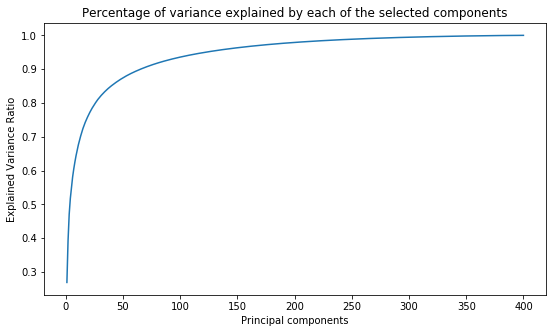

In [49]:
# PCA
pca = PCA(n_components = 400, svd_solver = 'randomized', whiten = True).fit(faces_data)
X_train_pca = pca.transform(faces_data)
dimension=np.array(range(1,401))
variance=(pca.explained_variance_ratio_)
variance_cum=np.cumsum(variance)
plt.figure(figsize=(9, 5))
print(plt.plot(dimension,variance_cum))
plt.title('Percentage of variance explained by each of the selected components')
plt.xlabel('Principal components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Text(0, 0.5, 'Second Principal Component')

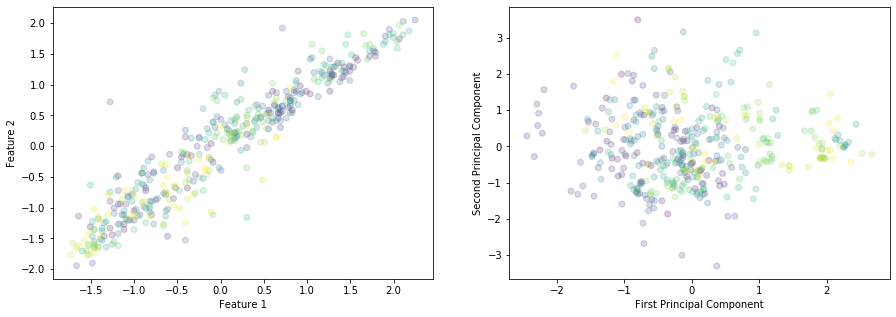

In [48]:
# Performing 2D-PCA 

pca = PCA(n_components = 2, svd_solver = 'randomized',  whiten = True).fit(faces_data)
X_train_pca = pca.transform(faces_data)
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(faces_data[:,0], faces_data[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
fig.add_subplot(1,2,2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=0.2, c=faces.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0.5, 1.0, 'Average Face')

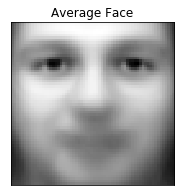

In [56]:
#Showing the average face by PCA

pca=PCA(n_components=90, whiten=True)
pca.fit(faces.data)
fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [19]:
# Performing SVM with different kernels after applying PCA

dimension=[2,5,15,20,30,50]
models=[]
models.append(("Linear",SVC(kernel = 'linear')))
models.append(("RBF",SVC(kernel = 'rbf')))
models.append(("Polynomial",SVC(kernel = 'poly')))
models.append(("Sigmoid",SVC(kernel = 'sigmoid')))
for i in dimension:    
    pca = PCA(n_components = i, svd_solver = 'randomized',  whiten = True).fit(faces_data)
    X_train_pca = pca.transform(faces_data)
    for name, model in models: 
        scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']        
        scores = cross_validate(model, X_train_pca, faces.target, scoring = scoring, cv = 5)
        print('Performing SVM with {} kernel after applying {}D-PCA'.format(name,i))
        print('Fit Time', scores['fit_time'].mean().round(3))
        print('Score Time', scores['score_time'].mean().round(3))
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
        print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
        print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
        print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))        
        print(scores)
        print('---')
'''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
axes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel After Applying 2D-PCA')
plt.xlabel('Scores')
plt.ylabel('Frequency')
sns.distplot(scores_2DPCA_SVM_linear['test_accuracy'])'''

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metri

Performing SVM with Linear kernel after applying 2D-PCA
Fit Time 0.007
Score Time 0.008
Accuracy: 0.21 (+/- 0.08)
Precision: 0.14 (+/- 0.07)
Recall: 0.21 (+/- 0.08)
f1-score: 0.15 (+/- 0.07)
{'fit_time': array([0.00698066, 0.00698018, 0.00698066, 0.00698185, 0.00797772]), 'score_time': array([0.00797963, 0.00797892, 0.00698185, 0.00897717, 0.00797772]), 'test_accuracy': array([0.1375, 0.2   , 0.2   , 0.225 , 0.2625]), 'test_precision_macro': array([0.08208333, 0.15125   , 0.12130952, 0.14151786, 0.19363095]), 'test_recall_macro': array([0.1375, 0.2   , 0.2   , 0.225 , 0.2625]), 'test_f1_macro': array([0.09630952, 0.14970779, 0.14206349, 0.16015873, 0.20178571])}
---
Performing SVM with RBF kernel after applying 2D-PCA
Fit Time 0.01
Score Time 0.009
Accuracy: 0.21 (+/- 0.09)
Precision: 0.13 (+/- 0.07)
Recall: 0.21 (+/- 0.09)
f1-score: 0.15 (+/- 0.07)
{'fit_time': array([0.00997615, 0.00997329, 0.00997305, 0.00897527, 0.00997281]), 'score_time': array([0.0099709 , 0.00797868, 0.00797868,

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', ave

Performing SVM with Polynomial kernel after applying 2D-PCA
Fit Time 0.009
Score Time 0.008
Accuracy: 0.24 (+/- 0.10)
Precision: 0.20 (+/- 0.06)
Recall: 0.24 (+/- 0.10)
f1-score: 0.19 (+/- 0.07)
{'fit_time': array([0.00897551, 0.00901294, 0.00899696, 0.00897598, 0.00797582]), 'score_time': array([0.00698161, 0.00997663, 0.00794864, 0.00698352, 0.0079484 ]), 'test_accuracy': array([0.15  , 0.225 , 0.2875, 0.275 , 0.2375]), 'test_precision_macro': array([0.15013889, 0.23672414, 0.22366667, 0.1902381 , 0.20851852]), 'test_recall_macro': array([0.15  , 0.225 , 0.2875, 0.275 , 0.2375]), 'test_f1_macro': array([0.1264411 , 0.20167819, 0.23667989, 0.20672619, 0.19571018])}
---
Performing SVM with Sigmoid kernel after applying 2D-PCA
Fit Time 0.01
Score Time 0.009
Accuracy: 0.10 (+/- 0.06)
Precision: 0.05 (+/- 0.04)
Recall: 0.10 (+/- 0.06)
f1-score: 0.06 (+/- 0.04)
{'fit_time': array([0.00897622, 0.01097059, 0.00901055, 0.00997376, 0.00894547]), 'score_time': array([0.009974  , 0.00997281, 0.0

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metri

Performing SVM with Linear kernel after applying 5D-PCA
Fit Time 0.008
Score Time 0.008
Accuracy: 0.64 (+/- 0.06)
Precision: 0.62 (+/- 0.08)
Recall: 0.64 (+/- 0.06)
f1-score: 0.60 (+/- 0.06)
{'fit_time': array([0.00797796, 0.00797915, 0.00797868, 0.00897861, 0.00897622]), 'score_time': array([0.00698161, 0.00797844, 0.00797892, 0.00797558, 0.00698137]), 'test_accuracy': array([0.65  , 0.65  , 0.6875, 0.6125, 0.6   ]), 'test_precision_macro': array([0.5975    , 0.63333333, 0.675     , 0.5525    , 0.63166667]), 'test_recall_macro': array([0.65  , 0.65  , 0.6875, 0.6125, 0.6   ]), 'test_f1_macro': array([0.59761905, 0.60833333, 0.65083333, 0.55892857, 0.58059524])}
---
Performing SVM with RBF kernel after applying 5D-PCA
Fit Time 0.011
Score Time 0.009
Accuracy: 0.61 (+/- 0.12)
Precision: 0.59 (+/- 0.16)
Recall: 0.61 (+/- 0.12)
f1-score: 0.57 (+/- 0.13)
{'fit_time': array([0.01097083, 0.01196885, 0.01097083, 0.01097107, 0.01196766]), 'score_time': array([0.00897503, 0.00897598, 0.00897622

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', avera

Performing SVM with Polynomial kernel after applying 5D-PCA
Fit Time 0.009
Score Time 0.007
Accuracy: 0.50 (+/- 0.08)
Precision: 0.54 (+/- 0.15)
Recall: 0.50 (+/- 0.08)
f1-score: 0.49 (+/- 0.11)
{'fit_time': array([0.00997353, 0.00897527, 0.00897574, 0.0079782 , 0.00897455]), 'score_time': array([0.00698137, 0.00698185, 0.00698161, 0.00798035, 0.00698137]), 'test_accuracy': array([0.4625, 0.5   , 0.55  , 0.5375, 0.45  ]), 'test_precision_macro': array([0.49575   , 0.51464286, 0.66572917, 0.55829545, 0.44596491]), 'test_recall_macro': array([0.4625, 0.5   , 0.55  , 0.5375, 0.45  ]), 'test_f1_macro': array([0.45453704, 0.47116013, 0.57456349, 0.51364469, 0.41613095])}
---
Performing SVM with Sigmoid kernel after applying 5D-PCA
Fit Time 0.009
Score Time 0.009
Accuracy: 0.48 (+/- 0.07)
Precision: 0.43 (+/- 0.09)
Recall: 0.48 (+/- 0.07)
f1-score: 0.43 (+/- 0.07)
{'fit_time': array([0.00897551, 0.00897574, 0.00897598, 0.00897598, 0.00897622]), 'score_time': array([0.00897622, 0.00997305, 0.

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', avera

Performing SVM with Linear kernel after applying 15D-PCA
Fit Time 0.012
Score Time 0.01
Accuracy: 0.94 (+/- 0.06)
Precision: 0.95 (+/- 0.06)
Recall: 0.94 (+/- 0.06)
f1-score: 0.94 (+/- 0.07)
{'fit_time': array([0.01196742, 0.01096964, 0.01296401, 0.009974  , 0.0119698 ]), 'score_time': array([0.00797915, 0.00997567, 0.00897503, 0.00997305, 0.01096988]), 'test_accuracy': array([1.   , 0.925, 0.95 , 0.925, 0.925]), 'test_precision_macro': array([1.        , 0.9125    , 0.9625    , 0.94583333, 0.92083333]), 'test_recall_macro': array([1.   , 0.925, 0.95 , 0.925, 0.925]), 'test_f1_macro': array([1.        , 0.91      , 0.9475    , 0.92083333, 0.9125    ])}
---
Performing SVM with RBF kernel after applying 15D-PCA
Fit Time 0.017
Score Time 0.01
Accuracy: 0.92 (+/- 0.08)
Precision: 0.92 (+/- 0.09)
Recall: 0.92 (+/- 0.08)
f1-score: 0.91 (+/- 0.09)
{'fit_time': array([0.01595592, 0.01695323, 0.01695323, 0.01695466, 0.01695442]), 'score_time': array([0.01097298, 0.00897622, 0.009974  , 0.008976

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', avera

Performing SVM with Polynomial kernel after applying 15D-PCA
Fit Time 0.013
Score Time 0.007
Accuracy: 0.70 (+/- 0.14)
Precision: 0.80 (+/- 0.17)
Recall: 0.70 (+/- 0.14)
f1-score: 0.72 (+/- 0.15)
{'fit_time': array([0.01296544, 0.01296377, 0.01296067, 0.0119679 , 0.0119679 ]), 'score_time': array([0.00797915, 0.00797963, 0.00698161, 0.00698185, 0.00698113]), 'test_accuracy': array([0.775 , 0.725 , 0.75  , 0.5875, 0.6625]), 'test_precision_macro': array([0.9025    , 0.80208333, 0.86904762, 0.6765625 , 0.73525641]), 'test_recall_macro': array([0.775 , 0.725 , 0.75  , 0.5875, 0.6625]), 'test_f1_macro': array([0.80454545, 0.73717949, 0.77434783, 0.60294118, 0.66857143])}
---
Performing SVM with Sigmoid kernel after applying 15D-PCA
Fit Time 0.012
Score Time 0.011
Accuracy: 0.89 (+/- 0.10)
Precision: 0.89 (+/- 0.12)
Recall: 0.89 (+/- 0.10)
f1-score: 0.88 (+/- 0.11)
{'fit_time': array([0.01200104, 0.01196432, 0.01093936, 0.01096964, 0.01193881]), 'score_time': array([0.00997615, 0.00997329, 

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metri

Performing SVM with Linear kernel after applying 20D-PCA
Fit Time 0.012
Score Time 0.009
Accuracy: 0.95 (+/- 0.06)
Precision: 0.95 (+/- 0.07)
Recall: 0.95 (+/- 0.06)
f1-score: 0.94 (+/- 0.07)
{'fit_time': array([0.01196861, 0.01196766, 0.01296592, 0.01196957, 0.01096797]), 'score_time': array([0.00797844, 0.00797868, 0.00797915, 0.009974  , 0.00997353]), 'test_accuracy': array([1.    , 0.925 , 0.9625, 0.9125, 0.925 ]), 'test_precision_macro': array([1.        , 0.90416667, 0.97083333, 0.93958333, 0.92083333]), 'test_recall_macro': array([1.    , 0.925 , 0.9625, 0.9125, 0.925 ]), 'test_f1_macro': array([1.        , 0.90833333, 0.96083333, 0.915     , 0.9125    ])}
---
Performing SVM with RBF kernel after applying 20D-PCA
Fit Time 0.019
Score Time 0.01
Accuracy: 0.94 (+/- 0.05)
Precision: 0.94 (+/- 0.08)
Recall: 0.94 (+/- 0.05)
f1-score: 0.94 (+/- 0.06)
{'fit_time': array([0.02094531, 0.01894999, 0.01795149, 0.01894903, 0.01894903]), 'score_time': array([0.00897408, 0.01097083, 0.0110025

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitl

Performing SVM with Polynomial kernel after applying 20D-PCA
Fit Time 0.013
Score Time 0.008
Accuracy: 0.76 (+/- 0.15)
Precision: 0.86 (+/- 0.08)
Recall: 0.76 (+/- 0.15)
f1-score: 0.77 (+/- 0.12)
{'fit_time': array([0.01392198, 0.01393056, 0.01296377, 0.01298594, 0.01293731]), 'score_time': array([0.00801182, 0.00898099, 0.00698185, 0.00795889, 0.00798321]), 'test_accuracy': array([0.8375, 0.8125, 0.75  , 0.7625, 0.625 ]), 'test_precision_macro': array([0.88958333, 0.87880952, 0.88179825, 0.84861111, 0.78083333]), 'test_recall_macro': array([0.8375, 0.8125, 0.75  , 0.7625, 0.625 ]), 'test_f1_macro': array([0.835     , 0.81444444, 0.77892857, 0.77416667, 0.660625  ])}
---
Performing SVM with Sigmoid kernel after applying 20D-PCA
Fit Time 0.012
Score Time 0.01
Accuracy: 0.92 (+/- 0.06)
Precision: 0.93 (+/- 0.06)
Recall: 0.92 (+/- 0.06)
f1-score: 0.91 (+/- 0.07)
{'fit_time': array([0.01296425, 0.01296425, 0.0119679 , 0.01199961, 0.01093936]), 'score_time': array([0.009974  , 0.01097059, 0

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\b

Performing SVM with Linear kernel after applying 30D-PCA
Fit Time 0.014
Score Time 0.009
Accuracy: 0.97 (+/- 0.04)
Precision: 0.96 (+/- 0.06)
Recall: 0.97 (+/- 0.04)
f1-score: 0.96 (+/- 0.06)
{'fit_time': array([0.01396298, 0.01396275, 0.01396275, 0.01396275, 0.0129652 ]), 'score_time': array([0.00997281, 0.00997329, 0.00897574, 0.00797868, 0.00997353]), 'test_accuracy': array([1.    , 0.9375, 0.9625, 0.975 , 0.95  ]), 'test_precision_macro': array([1.        , 0.9125    , 0.975     , 0.9875    , 0.94166667]), 'test_recall_macro': array([1.    , 0.9375, 0.9625, 0.975 , 0.95  ]), 'test_f1_macro': array([1.        , 0.91833333, 0.96      , 0.975     , 0.94083333])}
---
Performing SVM with RBF kernel after applying 30D-PCA
Fit Time 0.02
Score Time 0.011
Accuracy: 0.97 (+/- 0.05)
Precision: 0.96 (+/- 0.08)
Recall: 0.97 (+/- 0.05)
f1-score: 0.96 (+/- 0.07)
{'fit_time': array([0.01894927, 0.01894975, 0.01994705, 0.0199461 , 0.0209434 ]), 'score_time': array([0.01097012, 0.01097083, 0.0099735

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitl

Performing SVM with Polynomial kernel after applying 30D-PCA
Fit Time 0.017
Score Time 0.009
Accuracy: 0.66 (+/- 0.10)
Precision: 0.78 (+/- 0.09)
Recall: 0.66 (+/- 0.10)
f1-score: 0.68 (+/- 0.10)
{'fit_time': array([0.0179522 , 0.01595759, 0.01695442, 0.01595664, 0.01595712]), 'score_time': array([0.00897789, 0.01000428, 0.00897622, 0.00897622, 0.00897717]), 'test_accuracy': array([0.7125, 0.7125, 0.65  , 0.6125, 0.5875]), 'test_precision_macro': array([0.81875   , 0.81875   , 0.82666667, 0.7390625 , 0.71813725]), 'test_recall_macro': array([0.7125, 0.7125, 0.65  , 0.6125, 0.5875]), 'test_f1_macro': array([0.73217949, 0.73217949, 0.69479167, 0.64044118, 0.61444444])}
---
Performing SVM with Sigmoid kernel after applying 30D-PCA
Fit Time 0.015
Score Time 0.013
Accuracy: 0.95 (+/- 0.05)
Precision: 0.95 (+/- 0.06)
Recall: 0.95 (+/- 0.05)
f1-score: 0.94 (+/- 0.06)
{'fit_time': array([0.0159924 , 0.01496005, 0.01396823, 0.0149312 , 0.01595736]), 'score_time': array([0.01296163, 0.01196814, 

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 50D-PCA
Fit Time 0.026
Score Time 0.013
Accuracy: 0.97 (+/- 0.07)
Precision: 0.98 (+/- 0.05)
Recall: 0.97 (+/- 0.07)
f1-score: 0.97 (+/- 0.07)
{'fit_time': array([0.02593088, 0.02792597, 0.0269599 , 0.02591276, 0.02390766]), 'score_time': array([0.01396275, 0.01296449, 0.01397967, 0.01193643, 0.01399636]), 'test_accuracy': array([1.    , 1.    , 0.9875, 0.9125, 0.95  ]), 'test_precision_macro': array([1.        , 1.        , 0.99166667, 0.95166667, 0.9375    ]), 'test_recall_macro': array([1.    , 1.    , 0.9875, 0.9125, 0.95  ]), 'test_f1_macro': array([1.        , 1.        , 0.98666667, 0.91095238, 0.93916667])}
---
Performing SVM with Polynomial kernel after applying 50D-PCA
Fit Time 0.021
Score Time 0.011
Accuracy: 0.56 (+/- 0.11)
Precision: 0.69 (+/- 0.14)
Recall: 0.56 (+/- 0.11)
f1-score: 0.59 (+/- 0.12)
{'fit_time': array([0.02297902, 0.02094293, 0.02094603, 0.01991582, 0.01994181]), 'score_time': array([0.01192832, 0.01100302, 0.01

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

Performing SVM with Sigmoid kernel after applying 50D-PCA
Fit Time 0.021
Score Time 0.014
Accuracy: 0.97 (+/- 0.05)
Precision: 0.97 (+/- 0.04)
Recall: 0.97 (+/- 0.05)
f1-score: 0.96 (+/- 0.05)
{'fit_time': array([0.02194118, 0.0209415 , 0.02094722, 0.01994085, 0.01991558]), 'score_time': array([0.01496196, 0.01399183, 0.01396275, 0.01297021, 0.01399374]), 'test_accuracy': array([1.    , 0.975 , 0.975 , 0.9375, 0.9375]), 'test_precision_macro': array([1.        , 0.98333333, 0.98333333, 0.95416667, 0.94583333]), 'test_recall_macro': array([1.    , 0.975 , 0.975 , 0.9375, 0.9375]), 'test_f1_macro': array([1.        , 0.97333333, 0.97333333, 0.93416667, 0.93166667])}
---


"f, axes = plt.subplots( figsize = (7, 5), sharex = True)\naxes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel After Applying 2D-PCA')\nplt.xlabel('Scores')\nplt.ylabel('Frequency')\nsns.distplot(scores_2DPCA_SVM_linear['test_accuracy'])"

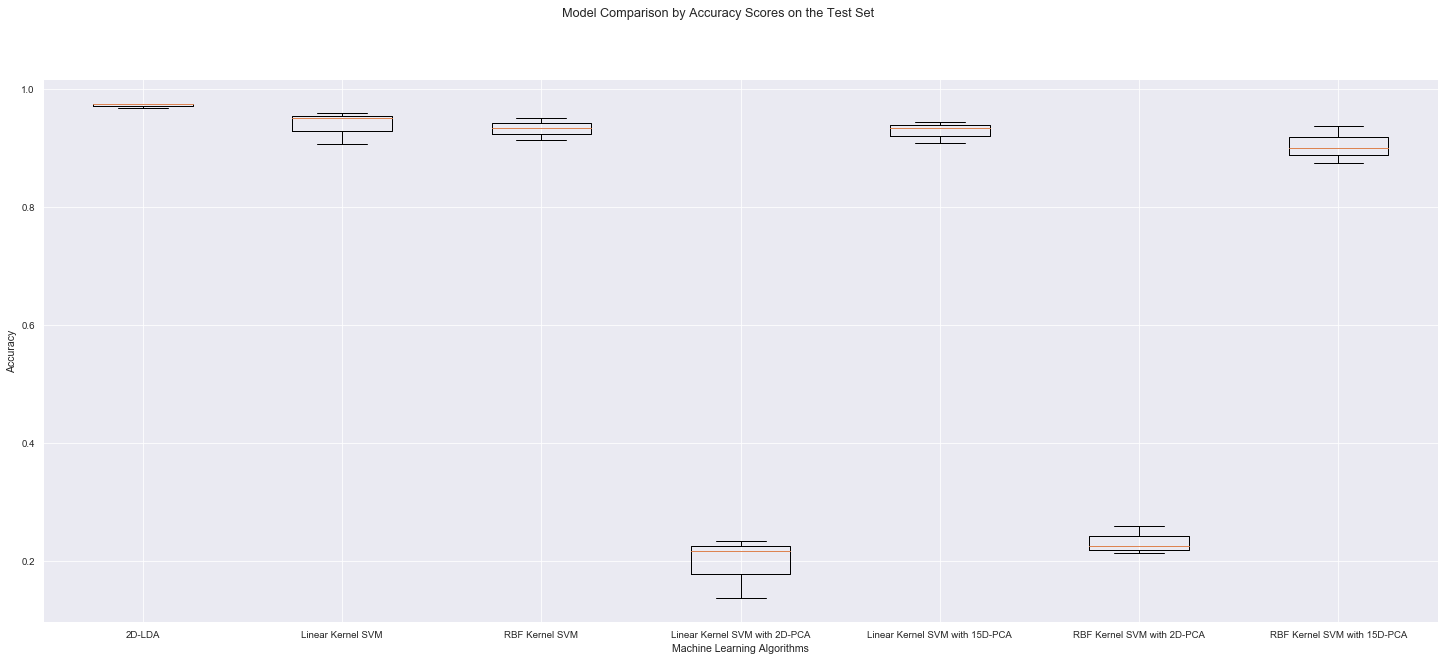

In [80]:
# Comparing Methods

model_names = ['2D-LDA', 'Linear Kernel SVM', 'RBF Kernel SVM', 'Linear Kernel SVM with 2D-PCA', 
               'Linear Kernel SVM with 15D-PCA', 'RBF Kernel SVM with 2D-PCA','RBF Kernel SVM with 15D-PCA']
outcome = []
outcome.append(scores_2DLDA['test_accuracy'])
outcome.append(scores_SVM_linear['test_accuracy'])
outcome.append(scores_SVM_RBF['test_accuracy'])
outcome.append(scores_2DPCA_SVM_linear['test_accuracy'])
outcome.append(scores_15DPCA_SVM_linear['test_accuracy'])
outcome.append(scores_2DPCA_SVM_RBF['test_accuracy'])
outcome.append(scores_15DPCA_SVM_RBF['test_accuracy'])

fig = plt.figure(figsize=(25, 10))
fig.suptitle('Model Comparison by Accuracy Scores on the Test Set')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
ax.set_xlabel("Machine Learning Algorithms")
ax.set_ylabel("Accuracy")
plt.show()


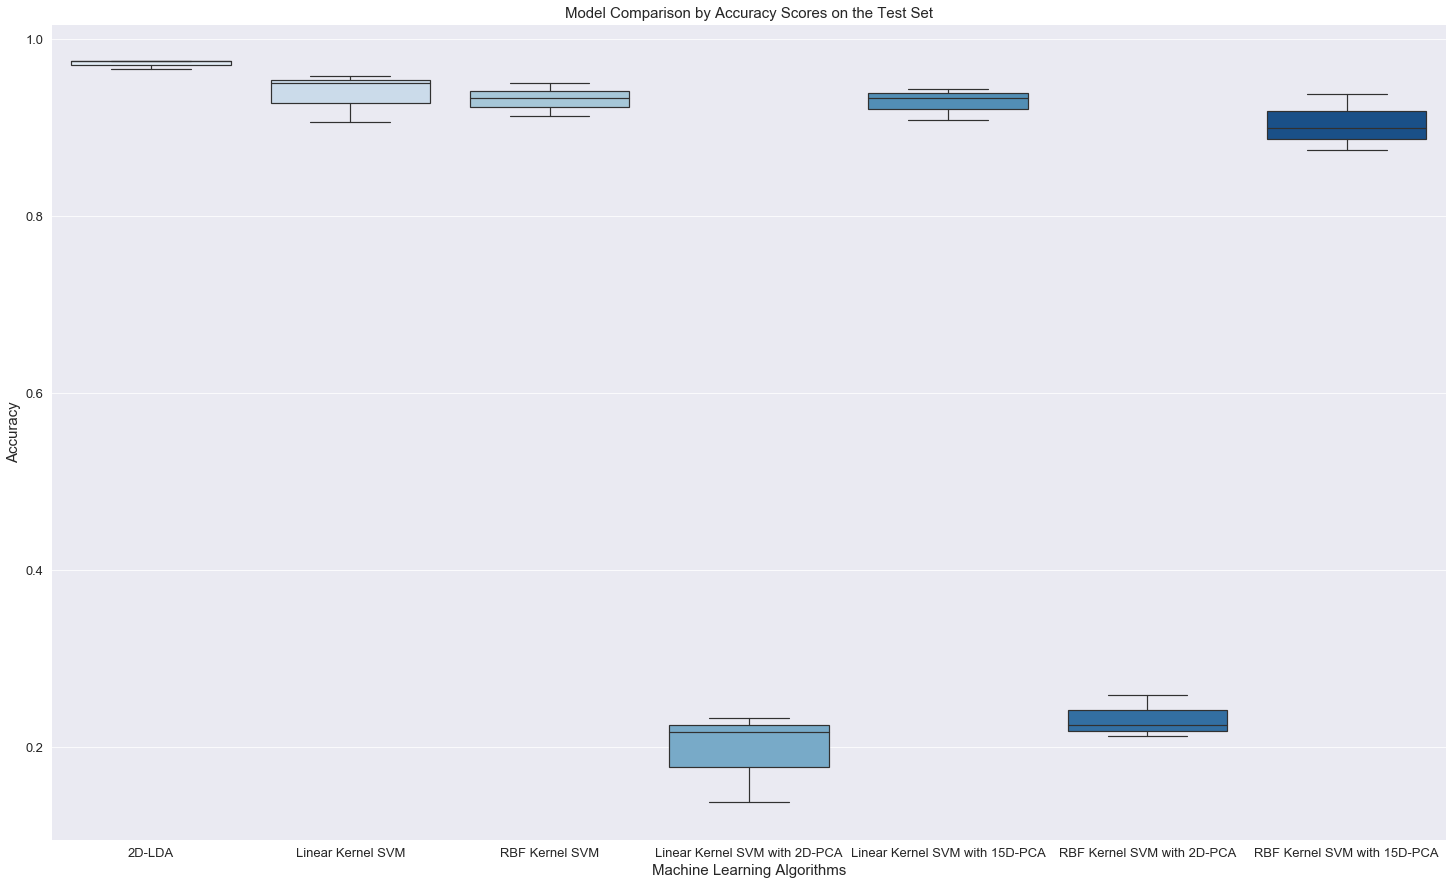

In [84]:
import seaborn as sns
#my_pal = {'LDA':'g', 'SVM_linear':'b', 'SVM_RBF':'m', 'PCA_SVM_linear':'y', 'PCA_SVM_RBF':'r'}
plt.figure(figsize = (25,15))
b=sns.boxplot(x = model_names, y = outcome, palette = "Blues")
b.set_xlabel("Machine Learning Algorithms", fontsize = 15)
b.set_ylabel("Accuracy", fontsize = 15)
#b.set_xticklabels(labels = model_names, rotation = 45)
plt.title('Model Comparison by Accuracy Scores on the Test Set',fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.set(font_scale = 7)
sns.set_context("paper", font_scale = 1.1)                                                  
for patch in ax.artists:
    yellow = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models=[]
models.append(('2D-LDA', LinearDiscriminantAnalysis(n_components = 2)))
models.append(("Linear-SVM",SVC(kernel = 'linear') ))
models.append(("RBF-SVM",SVC(kernel = 'rbf')))

pca = PCA(n_components = 2, svd_solver = 'randomized',  whiten = True).fit(faces_data)
faces_data_pca = pca.transform(faces_data)

for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, faces_data_pca, faces.target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

2D-LDA mean cross validations score:0.12
Linear-SVM mean cross validations score:0.13
RBF-SVM mean cross validations score:0.13


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni